# Vertical interpolation

This small notebook is meant to show vertical interpolation possibilities with AQUA. The method is included in the `Reader` but it is nothing more than a wrapper of the Xarray built-in `interp()` function. 
Let's see a few example!

## EN4

Let's open some 3d data, and ask them to regrid so that we can plot them

In [1]:
from aqua import Reader
reader = Reader(model="EN4", exp="en4", source="monthly", regrid="r100", fix=False)
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:             (time: 876, bnds: 2, lon: 360, lat: 180, lev: 42)
Coordinates:
  * time                (time) datetime64[ns] 1950-01-16T12:00:00 ... 2022-12...
  * lon                 (lon) float64 1.0 2.0 3.0 4.0 ... 358.0 359.0 360.0
  * lat                 (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * lev                 (lev) float32 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
    idx_lev             (lev) int64 0 1 2 3 4 5 6 7 ... 34 35 36 37 38 39 40 41
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    lon_bnds            (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    lat_bnds            (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lev_bnds            (lev, bnds) float32 dask.array<chunksize=(42, 2), meta=np.ndarray>
    so                  (time, lev, lat, lon) float32 dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    so_uncertainty      (time, lev, lat, lon) float32 dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    thetao              (time, lev, lat, lon) float32 dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
    thetao_uncertainty  (time, lev, lat, lon) float32 dask.array<chunksize=(12, 1, 180, 360), meta=np.ndarray>
Attributes: (12/25)
    CDI:                    Climate Data Interface version 2.0.5 (https://mpi...
    Conventions:            CF-1.0
    institution:            UK Met Office
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    ...                     ...
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...
    history:                Thu Jun 29 09:47:09 2023: cdo mergetime so_195001...
    NCO:                    netCDF Operators version 4.9.2 (Homepage = http:/...
    CDO:                    Climate Data Operators version 2.0.5 (https://mpi...

We exploit 3D regridding and we create a more practical dataset. Please be aware for oceanic dataset that it is mandatory to interpolate on the horizontal grid before interpolating on the vertical axis, while this should not be necessary for atmospheric datasets. This is because weights for regridding are available on the original vertical levels, and in the ocean this will not work if you move to a different vertical level. On the other hand, for the atmosphere weights are not dependent on the vertical level so the operation can be done in any order 

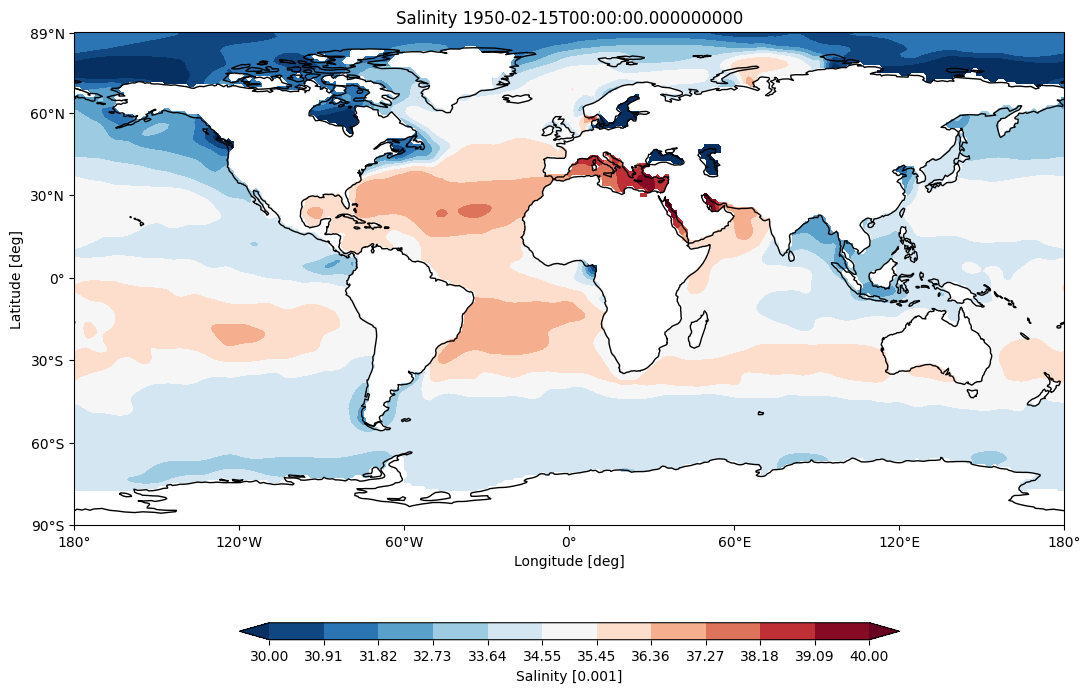

In [2]:
data.so.isel(time=1).isel(lev=1).aqua.regrid().aqua.plot_single_map(vmin=30, vmax=40)

EN4 data has one vertical axe `lev` (unfixed name of axe). We can then simply call the `vertinterp()` method. For convenience we subselect 5 timesteps and then simply plot it.

2024-02-15 17:46:03 :: Reader :: WARNING  -> Units of vert_coord=lev has not defined, reading from the data


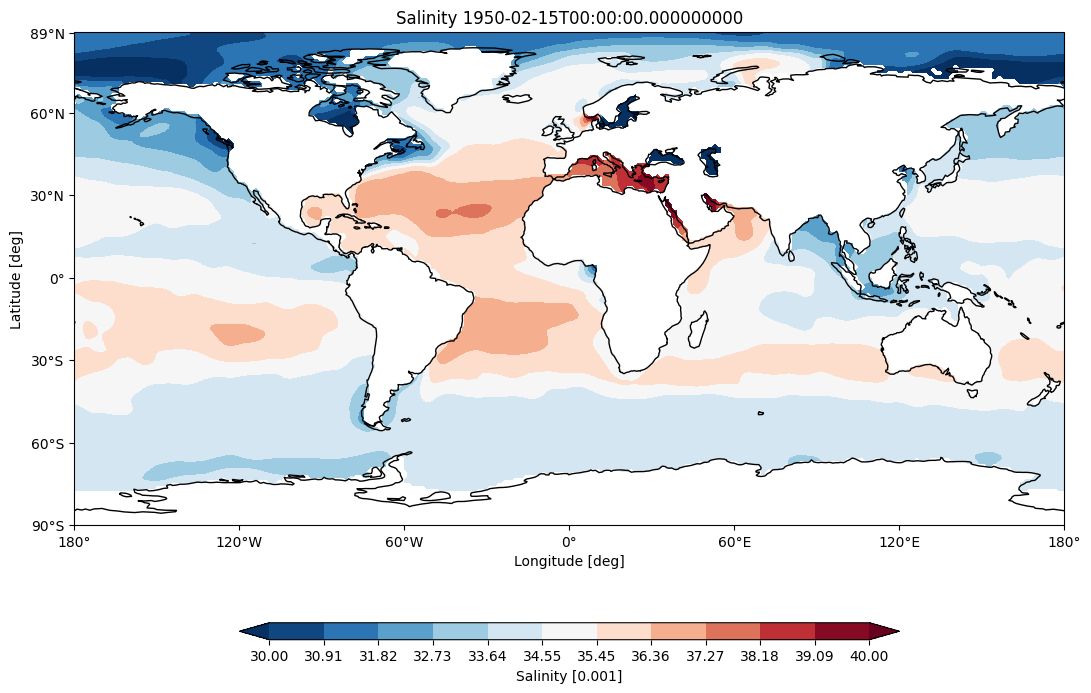

In [3]:
data_interp = data.so.isel(time=slice(0,5)).aqua.regrid().aqua.vertinterp(levels=[10, 20], vert_coord='lev')
data_interp.isel(time=1).isel(lev=1).aqua.plot_single_map(vmin=30, vmax=40)

Please note that this is not identical from the previous plot, i.e. the vertical interpolation works as expected. 

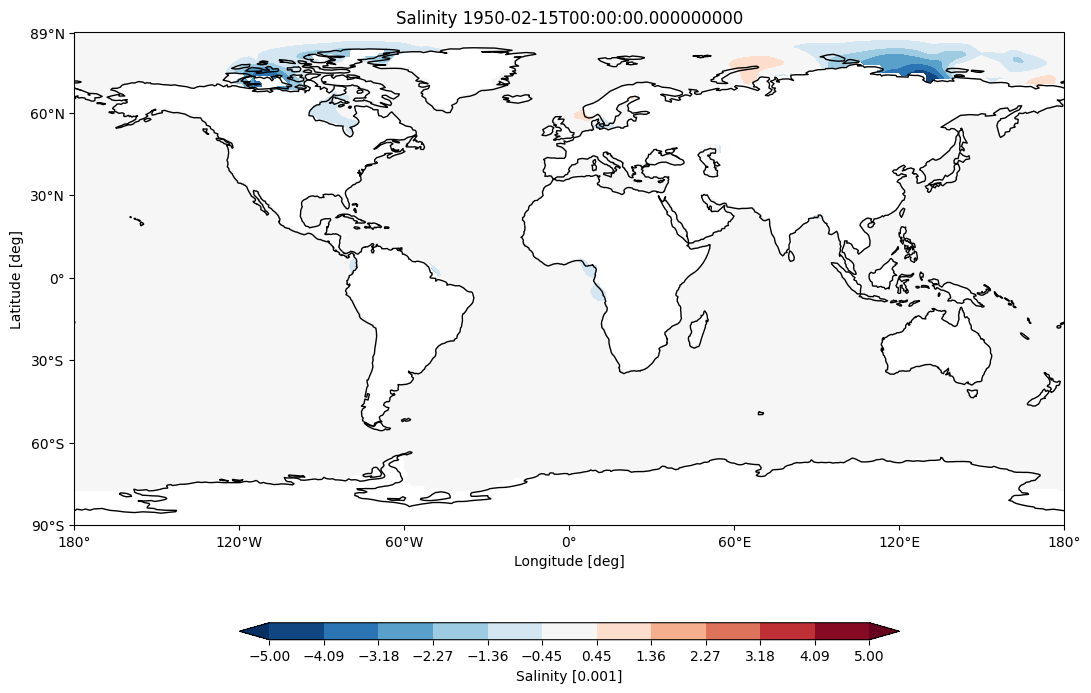

In [4]:
difference = data.so.isel(time=1).isel(lev=0).aqua.regrid()-data_interp.isel(time=1).isel(lev=0)
difference.aqua.plot_single_map(vmin=-5, vmax=5)

## ERA5

Another example of what can be achieved with the vertical interpolation can be shown with ERA5

In [5]:
reader = Reader(model="ERA5", exp="era5", source="monthly", regrid="r100")
data = reader.retrieve()
data

2024-02-15 17:46:13 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-02-15 17:46:13 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right


<xarray.Dataset>
Dimensions:     (time: 996, lat: 721, lon: 1440, plev: 8)
Coordinates:
  * time        (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat         (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon         (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * plev        (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
Data variables: (12/20)
    avg_siconc  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mer         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    HCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    LCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    MCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...          ...
    tcc         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtpr        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnswrf     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnlwrf     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    u           (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    v           (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Dec 06 11:40:11 2023: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We just select one variable, and then we ask to perform the vertical interpolation. Please note that we will convert the unit asking a specific units for the vertical axis. We ask for a single specific vertical level, and we plot it after regridding. 

2024-02-15 17:46:13 :: Reader :: WARNING  -> Converting vert_coord units to interpolate from Pa to hPa


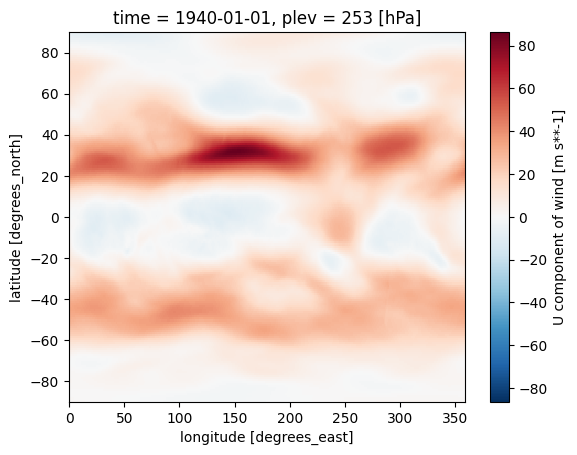

In [6]:
interp=reader.vertinterp(data['u'].isel(time=[0,1]), levels=253, vert_coord='plev', units='hPa')
final=reader.regrid(interp)
final.isel(time=0).plot()